In [1]:
import pymc3 as pm

ImportError: No module named pymc3

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df = pd.read_csv('campaign.csv', delimiter=';')

IOError: File campaign.csv does not exist

In [17]:
ctrl = df.query('CONTROL_GROUP_FLG == "Y"')
trl = df.query('CONTROL_GROUP_FLG == "N"')

In [30]:
trl.FLG.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
figsize(12, 4)

#these two quantities are unknown to us.
true_p_trl = 0.05
true_p_ctrl = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_trl = trl.shape[0]
N_ctrl = ctrl.shape[0]

#generate some observations
observations_trl = trl.FLG.values
observations_ctrl = ctrl.FLG.values

In [39]:
print(np.mean(observations_trl))
print(np.mean(observations_ctrl))

0.0480566248603
0.0365209034118


In [40]:
# Set up the pymc3 model. Again assume Uniform priors for p_trl and p_ctrl.
with pm.Model() as model:
    p_trl = pm.Uniform("p_trl", 0, 1)
    p_ctrl = pm.Uniform("p_ctrl", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_trl - p_ctrl)

    
    # Set of observations, in this case we have two observation datasets.
    obs_trl = pm.Bernoulli("obs_trl", p_trl, observed=observations_trl)
    obs_ctrl = pm.Bernoulli("obs_ctrl", p_ctrl, observed=observations_ctrl)

    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]

C:\Users\NekrasovV\AppData\Local\Continuum\Anaconda2\lib\site-packages\theano\tensor\basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [1:08:33<00:00,  4.90it/s]


Below we plot the posterior distributions for the three unknowns: 

In [41]:
p_trl_samples = burned_trace["p_trl"]
p_ctrl_samples = burned_trace["p_ctrl"]
delta_samples = burned_trace["delta"]

NameError: name 'p_trl_samples' is not defined

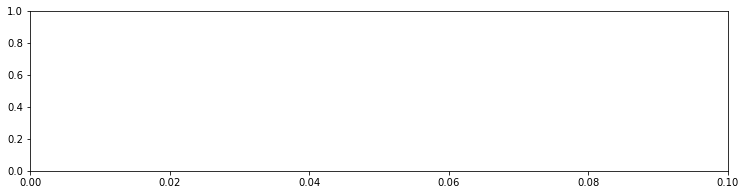

In [5]:
figsize(12.5, 10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_trl_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_{trl}$", color="#A60628", normed=True)
plt.vlines(true_p_trl, 0, 350, linestyle="--", label="true $p_trl$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_trl$, $p_ctrl$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_ctrl_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_{ctrl}$", color="#467821", normed=True)
plt.vlines(true_p_ctrl, 0, 200, linestyle="--", label="true $p_ctrl$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_trl - true_p_ctrl, 0, 200, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 200, color="black", alpha=0.2)
plt.legend(loc="upper right");

In [44]:
print("Probability trl is WORSE than ctrl: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability trl is BETTER than ctrl: %.3f" % \
    np.mean(delta_samples > 0))

Probability trl is WORSE than ctrl: 0.000
Probability trl is BETTER than ctrl: 1.000
